<a href="https://colab.research.google.com/github/callmeRajesh/heart-disease-neural-network/blob/main/Heart_disease_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Heart disease dataset

*   age (Age of the patient in years)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg resting electrocardiographic results ([normal, stt abnormality, lv hypertrophy])
* thalach maximum heart rate achieved
* exang exercise-induced angina (True/ False)
* oldpeak ST depression induced by exercise relative to rest
* slope the slope of the peak exercise ST segment
* ca number of major vessels (0-3) colored by fluoroscopy
* thal [normal; fixed defect; reversible defect]
* target the predicted attribute



In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Import the File

In [3]:
df = pd.read_csv("/content/heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [4]:
print("All columns in the dataset")
print(df.columns)
print("confirming number of datas and its datatype")
info = df.info()
print(info)
print("\n")
print("confirming any null values")
non_value= df.isnull().sum()
print(non_value)

All columns in the dataset
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
confirming number of datas and its datatype
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5   fbs       606 non-null    int64  
 6   restecg   606 non-null    int64  
 7   thalach   606 non-null    int64  
 8   exang     606 non-null    int64  
 9   oldpeak   606 non-null    float64
 10  slope     606 non-null    int64  
 11  ca        606 non-null    int64  
 12  thal      606 non-null    int64  
 13  target    606 non-null    int64  
dtypes: float64(1), int64(13)
memory usag

In [5]:
# Sex is a non value added data that has no contribution in predicting for heart disease
# So we can remove the column
df = df.drop("sex",axis=1)

In [ ]:
df.head(10)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,3,120,193,0,0,162,0,1.9,1,0,3,1
5,68,0,144,193,1,1,141,0,3.4,1,2,3,0
6,63,0,130,254,0,0,147,0,1.4,1,1,3,0
7,35,0,126,282,0,0,156,1,0.0,2,0,3,0
8,66,0,120,302,0,0,151,0,0.4,1,0,2,1
9,63,0,108,269,0,1,169,1,1.8,1,2,2,0


####Select the feature and target

In [6]:
X = df.drop("target" , axis = 1)
y = df["target"]

####Feature Scaling

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

####Split the data

In [8]:
Xtrain , Xtest , ytrain , ytest = train_test_split(X_scaled , y , test_size=0.2, random_state=42)

####Creating the neural network

In [9]:
model = keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(Xtrain.shape[1],)),
    layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


####Compile the model

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

####Train the model

In [15]:
created_model = model.fit(Xtrain, ytrain, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5133 - loss: 0.6660 - val_accuracy: 0.4433 - val_loss: 0.7076
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5685 - loss: 0.6317 - val_accuracy: 0.5258 - val_loss: 0.6770
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6059 - loss: 0.6352 - val_accuracy: 0.5876 - val_loss: 0.6501
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6725 - loss: 0.6049 - val_accuracy: 0.6907 - val_loss: 0.6260
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7182 - loss: 0.5951 - val_accuracy: 0.7113 - val_loss: 0.6038
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7653 - loss: 0.5702 - val_accuracy: 0.7526 - val_loss: 0.5851
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7837 - loss: 0.5669 - val_accuracy: 0.7526 - val_loss: 0.5746
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7688 - loss: 0.5589 - val_accuracy: 0.7732 -

####Model Evaluation

In [16]:
loss, accuracy = model.evaluate(Xtest, ytest)
print(f"Test Accuracy: {accuracy:.3f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7783 - loss: 0.4439 
Test Accuracy: 0.787


In [17]:
y_pred = model.predict(Xtest)
y_pred = (y_pred > 0.5).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


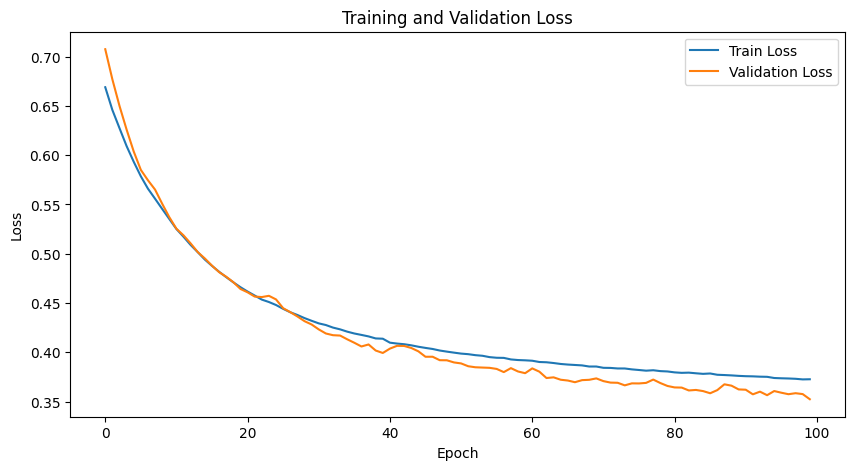

In [18]:
plt.figure(figsize=(10,5))
plt.plot(created_model.history['loss'], label='Train Loss')
plt.plot(created_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

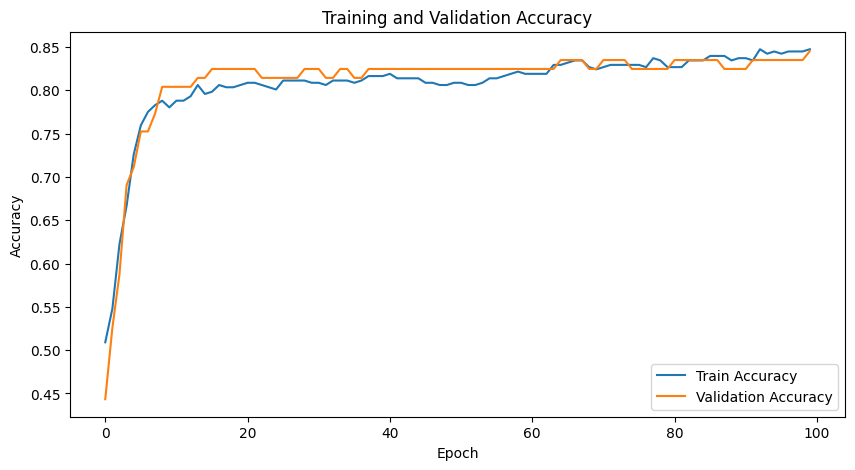

In [19]:
plt.figure(figsize=(10,5))
plt.plot(created_model.history['accuracy'], label='Train Accuracy')
plt.plot(created_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

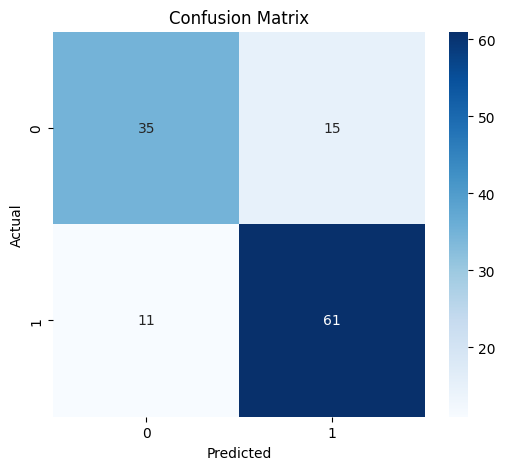

In [22]:
confusionMatrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        50
           1       0.80      0.85      0.82        72

    accuracy                           0.79       122
   macro avg       0.78      0.77      0.78       122
weighted avg       0.79      0.79      0.79       122



In [24]:
print(np.unique(y_pred, return_counts=True))

(array([0, 1]), array([46, 76]))
